**ЛР 3**  
**Вариант 20**

**Многослойные сети. Алгоритм обратного распространения ошибки.**

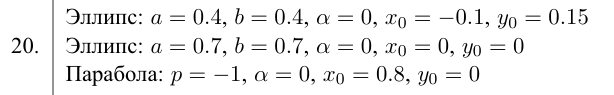

In [40]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers

import math
import itertools
import numpy as np
import matplotlib.pyplot as plt

In [41]:
# Уравнение эллипса в параметрическом виде.
def ellipse(t, a, b, x0, y0):
    x = x0 + a * np.cos(t)
    y = y0 + b * np.sin(t)
    return x, y
# Уравнение параболы в параметрическом виде.
def parabola(t, p, x0, y0):
    x = x0 + t ** 2 / (2. * p)
    y = y0 + t
    return x, y
# Функция вращения фигуры на заданный угол.
def rotate(x, y, alpha):
    xr = x * np.cos(alpha) - y * np.sin(alpha)
    yr = x * np.sin(alpha) + y * np.cos(alpha)
    return xr, yr

**Часть 1**

In [42]:
t = np.arange(0, 2 * np.pi, 0.001)

In [43]:
a1 = 0.4
b1 = 0.4
alpha1 = 0
x01 = -0.1
y01 = 0.15
ell1_x, ell1_y = ellipse(t, a1, b1, x01, y01)
ell1_x, ell1_y = rotate(ell1_x, ell1_y, alpha1)
ellipse1 = np.array(list(zip(ell1_x, ell1_y)))
print(len(ell1_x))
print(len(ellipse1))
ellipse1_val = [[1, 0, 0] for i in range(len(ellipse1))]
print(len(ellipse1_val))
ellipse1

6284
6284
6284


array([[0.3       , 0.15      ],
       [0.2999998 , 0.1504    ],
       [0.2999992 , 0.1508    ],
       ...,
       [0.29999904, 0.14912588],
       [0.29999972, 0.14952588],
       [0.29999999, 0.14992588]])

In [44]:
a2 = 0.7
b2 = 0.7
alpha2 = 0
x02 = 0
y02 = 0
ell2_x, ell2_y = ellipse(t, a2, b2, x02, y02)
ell2_x, ell2_y = rotate(ell2_x, ell2_y, alpha2)
ellipse2 = np.array(list(zip(ell2_x, ell2_y)))
print(len(ell2_x))
print(len(ellipse2))
ellipse2_val = [[0, 1, 0] for i in range(len(ellipse2))]
print(len(ellipse2_val))
ell2_x

6284
6284
6284


array([0.7       , 0.69999965, 0.6999986 , ..., 0.69999833, 0.69999951,
       0.69999999])

In [45]:
p = -1
alpha3 = 0
x03 = 0.8
y03 = 0
p_x, p_y = parabola(t, p, x03, y03)
p_x, p_y = rotate(p_x, p_y, alpha3)
par =  np.array(list(zip(p_x, p_y)))
print(len(p_x))
print(len(par))
par_val = [[0, 0, 1] for i in range(len(par))]
print(len(par_val))
par

6284
6284
6284


array([[ 8.00000000e-01,  0.00000000e+00],
       [ 7.99999500e-01,  1.00000000e-03],
       [ 7.99998000e-01,  2.00000000e-03],
       ...,
       [-1.89254805e+01,  6.28100000e+00],
       [-1.89317620e+01,  6.28200000e+00],
       [-1.89380445e+01,  6.28300000e+00]])

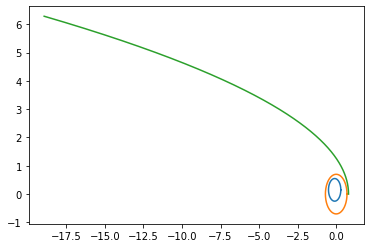

In [46]:
plt.plot(ell1_x, ell1_y)
plt.plot(ell2_x, ell2_y)
plt.plot(p_x, p_y)
plt.show()

In [47]:
x = np.linspace(-20, 3, 200)
y = np.linspace(-2, 8, 200)

Объединим в единое множество точек три фигуры

In [48]:
data = np.concatenate([ellipse1, ellipse2, par])
val = np.concatenate([ellipse1_val, ellipse2_val, par_val])
print(len(data))
print(len(val))
data

18852
18852


array([[  0.3      ,   0.15     ],
       [  0.2999998,   0.1504   ],
       [  0.2999992,   0.1508   ],
       ...,
       [-18.9254805,   6.281    ],
       [-18.931762 ,   6.282    ],
       [-18.9380445,   6.283    ]])

In [64]:
model = keras.models.Sequential()

model.add(layers.Dense(16, 
                       activation = "tanh", 
                       kernel_initializer=initializers.RandomNormal(stddev=0.01),
                       bias_initializer='zeros'))
model.add(layers.Dense(10, 
                       activation = "tanh"))
model.add(layers.Dense(3, 
                       activation = "sigmoid"))

model.compile(optimizer = tf.keras.optimizers.Adam(0.01), 
              loss = 'mse',
              metrics = ["mae"])

In [65]:
hist = model.fit(x = data, y = val, batch_size = 10, epochs = 50, shuffle = True)

Epoch 1/50
1886/1886 [==============================] - 4s 2ms/step - loss: 0.0508 - mae: 0.1366
Epoch 2/50
1886/1886 [==============================] - 3s 2ms/step - loss: 9.3352e-04 - mae: 0.0189
Epoch 3/50
1886/1886 [==============================] - 3s 2ms/step - loss: 1.6649e-04 - mae: 0.0082
Epoch 4/50
1886/1886 [==============================] - 3s 2ms/step - loss: 4.7582e-05 - mae: 0.0044
Epoch 5/50
1886/1886 [==============================] - 4s 2ms/step - loss: 1.5423e-05 - mae: 0.0025
Epoch 6/50
1886/1886 [==============================] - 3s 2ms/step - loss: 5.5546e-06 - mae: 0.0014
Epoch 7/50
1886/1886 [==============================] - 4s 2ms/step - loss: 3.7410e-04 - mae: 0.0017
Epoch 8/50
1886/1886 [==============================] - 4s 2ms/step - loss: 2.9344e-06 - mae: 9.0126e-04
Epoch 9/50
1886/1886 [==============================] - 3s 2ms/step - loss: 1.7986e-06 - mae: 7.5378e-04
Epoch 10/50
1886/1886 [==============================] - 3s 2ms/step - loss: 1.1255e-06

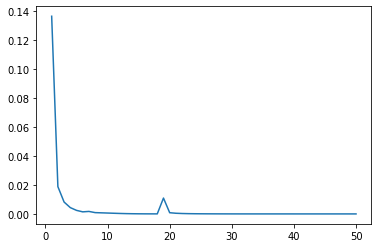

In [66]:
hist_x = [(i + 1) for i in range(len(hist.history["mae"]))]
plt.plot(hist_x, hist.history["mae"])

In [67]:
line = np.array(list(itertools.product(x, y)))
predictions = model.predict(line)

1250/1250 [==============================] - 2s 1ms/step


In [68]:
line

array([[-20.        ,  -2.        ],
       [-20.        ,  -1.94974874],
       [-20.        ,  -1.89949749],
       ...,
       [  3.        ,   7.89949749],
       [  3.        ,   7.94974874],
       [  3.        ,   8.        ]])

In [69]:
xs, ys = np.hsplit(line, 2)
print(xs)
print(ys)

[[-20.]
 [-20.]
 [-20.]
 ...
 [  3.]
 [  3.]
 [  3.]]
[[-2.        ]
 [-1.94974874]
 [-1.89949749]
 ...
 [ 7.89949749]
 [ 7.94974874]
 [ 8.        ]]


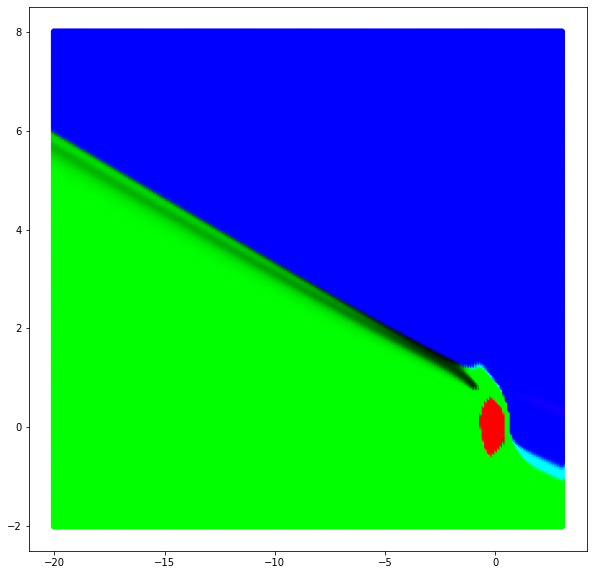

In [70]:
plt.figure(figsize = (10, 10))
plt.scatter(xs, ys, c = predictions)
plt.show()

**Часть 2**

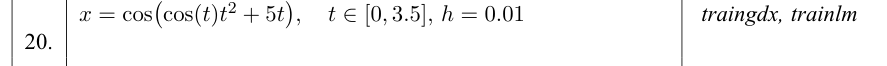

In [6]:
def f_t(t):
  return math.cos(math.cos(t) * t ** 2 + 5 * t)

In [8]:
l2 = 0
r2 = 3.5
h2 = 0.01
t2 = np.arange(l2, r2, h2)
fs = [f_t(i) for i in t2]

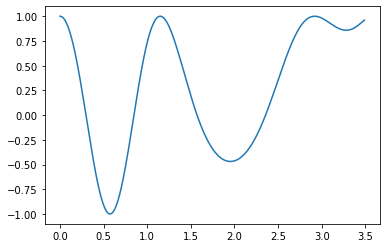

In [9]:
plt.plot(t2, fs)
plt.show()

In [11]:
train2_x = []
train2_y = []

for i in range(t2.shape[0]):
    train2_x.append(t2[i])
    train2_y.append(fs[i])

In [31]:
model2 = keras.models.Sequential()

model2.add(layers.Dense(32, 
                       input_dim = 1,
                       activation = "relu", 
                       kernel_initializer=initializers.RandomNormal(stddev=0.01),
                       bias_initializer='zeros'))
model2.add(layers.Dense(16, 
                       activation = "relu"))
model2.add(layers.Dense(15, 
                       activation = "tanh"))
model2.add(layers.Dense(1, 
                       activation = "tanh"))


model2.compile(optimizer = tf.keras.optimizers.SGD(0.05), 
              loss = 'mse',
              metrics = ["mae"])

In [36]:
history = model2.fit(train2_x, train2_y, batch_size = 1, epochs = 200, shuffle = True)

Epoch 1/200
350/350 [==============================] - 1s 3ms/step - loss: 0.0044 - mae: 0.0528
Epoch 2/200
350/350 [==============================] - 1s 2ms/step - loss: 0.0100 - mae: 0.0669
Epoch 3/200
350/350 [==============================] - 1s 2ms/step - loss: 0.0057 - mae: 0.0573
Epoch 4/200
350/350 [==============================] - 1s 2ms/step - loss: 0.0043 - mae: 0.0524
Epoch 5/200
350/350 [==============================] - 1s 2ms/step - loss: 0.0036 - mae: 0.0491
Epoch 6/200
350/350 [==============================] - 1s 2ms/step - loss: 0.0038 - mae: 0.0495
Epoch 7/200
350/350 [==============================] - 1s 2ms/step - loss: 0.0045 - mae: 0.0519
Epoch 8/200
350/350 [==============================] - 1s 2ms/step - loss: 0.0047 - mae: 0.0529
Epoch 9/200
350/350 [==============================] - 1s 2ms/step - loss: 0.0047 - mae: 0.0516
Epoch 10/200
350/350 [==============================] - 1s 2ms/step - loss: 0.0048 - mae: 0.0535
Epoch 11/200
350/350 [=================

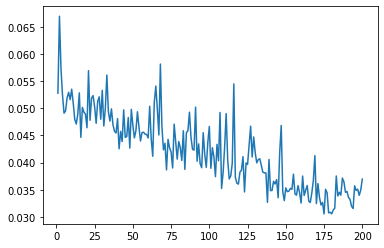

In [37]:
hist2_x = [(i + 1) for i in range(len(history.history["mae"]))]
plt.plot(hist2_x, history.history["mae"])

In [38]:
prediction2 = model2.predict(t2)

11/11 [==============================] - 0s 2ms/step


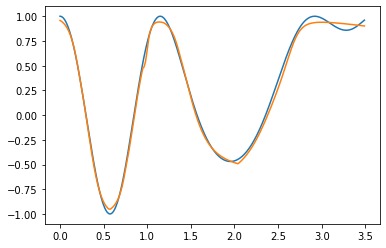

In [39]:
plt.plot(t2, fs)
plt.plot(t2, prediction2)
plt.show()